# CS 484 :: Data Mining :: George Mason University :: Spring 2023


# Homework 1: KNN&PCA

- **100 points [9% of your final grade]**
- **Due Sunday, Feb 26 by 11:59pm**

- *Goals of this homework:* (1) implement the KNN algorithm for classifying handwritten digit images; (2) implement the PCA algorithm to reduce the feature dimension so that we can speed up the KNN algorithm and also improve the classification performance; (3) tune the hyperparameters of the KNN and PCA algorithms to produce classification result as good as possible.

- *Submission instructions:* for this homework, you need to submit to two different platforms. First, you should submit your notebook file to **Blackboard** (look for the homework 1 assignment there). Please name your submission **FirstName_Lastname_hw1.ipynb**, so for example, my submission would be something like **Ziwei_Zhu_hw1.ipynb**. Your notebook should be fully executed so that we can see all outputs. Then, you need to output a txt file from this notebook (you will see later in this notebook) and submit it to the HW1 page in the http://miner2.vsnet.gmu.edu website.

## Part 1: KNN (40 points)

In this part, you need to implement your own KNN algorithm for classifying the digits (from 0 to 9) from the handwritten digit images (28 pixel * 28 pixel). The provided train.txt is the training data you will use for building your model. Each line in the file is one sample, whose first value is the ground-truth label and the following 784 values are the pixels of the image. First of all, let's load the data by excuting the following code.

In [4]:
import numpy as np
from tqdm import tqdm

data = np.loadtxt("train.txt", delimiter=',')
labels = data[:, 0].astype(int)
features = data[:, 1:]
#print('array of labels: shape ' + str(np.shape(labels)))
#print('array of feature matrix: shape ' + str(np.shape(features)))
#print(f'data shape: {data.shape}')
print(f'labels: {labels}')

labels: [5 0 4 ... 5 6 8]


Now, we have the label variable to store the ground-truth labels (from 0 to 9) of all 60,000 samples, and matrix features to store the image pixels of these samples. Next, let's excute the following code to plot the first 4 samples to see how these images look like.

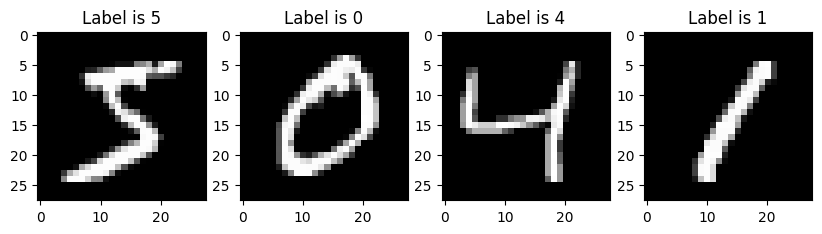

In [5]:
import matplotlib.pyplot as plt 
fig, ax = plt.subplots(1, 4, figsize=(10, 50))
for i in range(4):  
    ax[i].imshow(features[i].reshape((28, 28)), cmap=plt.get_cmap('gray'))
    ax[i].set_title('Label is %d' % labels[i])

Next, you need to randomly select 20% samples from the data as the **validation set**, and generate the new **training set** by removing the selected validation samples from the original dataset. Write your code in the next cell.

**Note: You are NOT allowed to directly call APIs from an exiting Machine Learning library like sklearn.**

In [6]:
# Write your code here
SAMPLE_LENGTH = 785
NUM_SAMPLES = 60000
VALIDATION_SIZE = int(NUM_SAMPLES * 0.2)
NUM_LABELS = 10
validation_set = []
validation_indicies = np.random.choice(NUM_SAMPLES,VALIDATION_SIZE,replace=False)

for i in validation_indicies:
    validation_set.append(data[i])
training_set = np.delete(data,validation_indicies,axis=0)
# TODO: set back to full set before submission
#training_set = training_set[0:5000,:]
#print(len(data))
print(len(training_set))
print(len(validation_set))
#for i in validation_set:
#    print(i[0])


48000
12000


Now, it's time to implement your KNN algorithm. In the next cell, please write your code to predict labels for samples in the validation set by the KNN model built on the training set. Here we set K = 10 and use the Euclidean distance to find neighbors.

**Note: You should implement the algorithm by Python, Numpy, and other libraries you think are necessary. You are NOT allowed to directly call APIs from an exiting Machine Learning library like sklearn.**

**Note: Here, you should only use the labels from the training set for the KNN model.**

In [191]:
# Write your code here
K = 10
#-------------------------------------------------------------------------------
#def get_distance(training_set,val):
def get_distance(point1,point2):
    #d = 0
    #for i in range(1,len(point1)):
    #    d = d + np.power((point1[i] - point2[i]),2)
    #ret = np.sqrt(d)
    p1_features = point1[1:]
    p2_features = point2[1:]
    #dist = np.sqrt(np.sum(np.power((p1_features-p2_features),2)))
    dist = np.sum((p1_features - p2_features)**2)
    #dist = np.linalg.norm(p1_features,p2_features)
    return dist
#-------------------------------------------------------------------------------
# TODO: MAKE SURE I HAVE THE RIGHT SET AS PARAMETERS 
def get_nn(training_set,point,k):
    # set empty arrays to len of validation set
    d = []
    for t in training_set:
        # get distance between training point and all validation samples
        dist = get_distance(point,t)
        
        #d.append((dist,point[0]))
        di = (dist,t[0])
        #print(type(di))
        d.append(di)
    #print(f'd len: {len(d)}')
        # add current test point to array of neighbors
    # sort and take the lowest K values
    # TODO: make sure sort is right    
    #neighbors = np.asarray(d)
    #neighbors = np.sort(neighbors,axis=0)
    neighbors = sorted(d,key=lambda x:x[0])
    #print(neighbors)
    neighbors = neighbors[:k]
    #print(f'point: {point[0]}')
    #print(f'neighbors: {neighbors[:,0]}')
    return neighbors
#-------------------------------------------------------------------------------
def most_common(neighbors):
    # take count of number neighbors with each of the NUM_LABELS labels
    count = np.zeros(10)
    # iterate over all neighbors
    for n in neighbors:
        # label is first row val as an int
        label = n[1].astype(int)
        # increment the corresponding index in count
        # by 1 for each matching label
        count[label] += 1
    #print(f'n count: {count}')
    return np.argmax(count)
#-------------------------------------------------------------------------------
def knn(training_set,validation_point,k):
    #print(f'point is: {validation_point[0]}')    
    n = get_nn(training_set,validation_point,k)
    label = most_common(n)
    #print(f'predicted: {label}')
    return label
#-------------------------------------------------------------------------------
predictions = []
# for i in validation_set:
#     prediction = knn(training_set,i,K)
#     #print(f'predicted label: {prediction}')
#     predictions.append(prediction)
# print(predictions)
#-------------------------------------------------------------------------------

Then, please write code to compute the Accuracy, and Micro-averaged and Macro-averaged F1 scores to evaluate the performance on the validation set and print out these three metrics.

In [192]:
#-------------------------------------------------------------------------------
# total for all samples
true_pos = 0  #label and image match
false_pos = 0 # label matches
false_neg = 0 # image matches
true_neg = 0 # no matches

# array to keep track of each result for each label
# each element is [TP,FP,FN,TN, F1]
label_results = np.array([
    [0,0,0,0,0], # 0
    [0,0,0,0,0], # 1
    [0,0,0,0,0], # 2
    [0,0,0,0,0], # 3
    [0,0,0,0,0], # 4
    [0,0,0,0,0], # 5
    [0,0,0,0,0], # 6
    [0,0,0,0,0], # 7
    [0,0,0,0,0], # 8
    [0,0,0,0,0], # 9
])
check = 0
for val in tqdm(validation_set):
    knn_label = knn(training_set,val,K).astype(int) # model's prediction for label
    actual_label = val[0].astype(int)
    #print(knn_label == actual_label)
    # if knn = actual - TP fir label_results[actual]
    if knn_label == actual_label:
        #print(f'!')
        label_results[actual_label][0] += 1 # inc TP for label
        true_pos += 1
        # inc TN for other labels
        for i in range(len(label_results)):
            if i != actual_label:
                label_results[i][3] += 1
                true_neg += 1
    else:
        #print(f'-')
        check += 1
        for i in range(len(label_results)):
            # for knn label: inc FP
            if i == knn_label:
                label_results[i][1] += 1
                false_pos += 1
            # for act label: inc FN
            if i == actual_label:
                label_results[i][2] += 1
                false_neg += 1
            # for others inc TN
            else:
                label_results[i][3] += 1
#-------------------------------------------------------------------------------
def precision(tp,fp):
    return ((tp)/(tp+fp))
#-------------------------------------------------------------------------------
def recall(tp,fn):
    return ((tp)/(tp+fn))
#-------------------------------------------------------------------------------
def f1_score(tp,fp,fn):
    return (2 * ((precision(tp,fp) * recall(tp,fn))/(precision(tp,fp) + recall(tp,fn))))
#-------------------------------------------------------------------------------
#-------------------------------------------------------------------------------

#----calculate accuracy----
accuracy = true_pos / VALIDATION_SIZE

#----calculate micro----
micro_f1 = f1_score(true_pos,false_pos,false_neg)
#----calculate macro----
# calculate f1 for each label
for label in label_results:
    print(label)
    label[4] = f1_score(label[0],label[1],label[2])
sums = np.sum(label_results,axis=0)
macro_f1 = sums[-1] / NUM_LABELS

print(f'accuracy: {accuracy}')
print(f'micro f1: {micro_f1}')
print(f'macro f1: {macro_f1}')

print(f'global results:\n{true_pos}\n{false_pos}\n{false_neg}\n{true_neg}')
print(f'arr results: {label_results}')
print(f'check {check}')


100%|██████████| 12000/12000 [31:29<00:00,  6.35it/s]

accuracy: 0.9666666666666667
micro f1: 0.9666666666666667
macro f1: 0.0
global results:
11600
400
400
104400
arr results: [[ 1127    33    10 10863     0]
 [ 1366    74    12 10622     0]
 [ 1173    19    63 10764     0]
 [ 1192    52    50 10758     0]
 [ 1121    27    38 10841     0]
 [ 1006    48    38 10956     0]
 [ 1193    27    23 10784     0]
 [ 1227    57    25 10748     0]
 [ 1048    21    76 10876     0]
 [ 1147    42    65 10788     0]]
check 400


micro_precision = ((tp1+tp2)/(tp1+fp1+tp2+fp2))
micro_recall = ((tp1+tp2)/(tp1+fn1+tp2+fn2))
micro_f1 = 2 * ((micro_precis * micro_recall)/(micro_precis + micro_recall))
 


## Part 2: PCA (30 points)

In this part, you will implement the PCA algorithm to reduce the input dimension for the handwritten digit recognition task. In the next cell, please write your code to compute the transformation matrix in the PCA method for the training set we got from the previous part. Here, we only keep the **top 50 dimensions**.

**Hint: You can use the function from the Numpy library to compute SVD:**

*u, s, v = np.linalg.svd(a, full_matrices=False)*


**Note: You should only use the training set to compute PCA without using validation set.**

In [193]:
# Write your code here
REDUCED_DIMENSION = 50
ORIGINAL_DIMENSION = 784
#-------------------------------------------------------------------------------
'''
convert validation set to np array

make copies of sets

remove labels

center training (set - means,axis=0)

get U from SVD(xTrain)

slice U into G

center validation

pca g.T with both sets
'''
#-------------------------------------------------------------------------------

# make copies to modify without reslicing same set over and over when cell is run
training_copy = training_set
validation_copy = np.asarray(validation_set) # turn arr into nparr
# store labels in case we need them later
validation_labels = validation_copy[:,0]
training_labels = training_copy[:,0]
print(f'training labels: {training_labels.shape}')
# remove labels
training_copy = training_copy[:,1:]
validation_copy = validation_copy[:,1:]
# center training set
training_means = np.mean(training_copy,axis=0)
xTrain = training_copy - training_means
print(f'xTrain shape: {xTrain.shape}')
# get U from svd(xTrain)
u,s,v = np.linalg.svd(xTrain,full_matrices=False)
print(f'u shape: {u.shape}')
# slice u into g
u = u.T
g = u[:,:50]
print(f'g shape: {g.shape}')
gT = g.T
print(f'gT shape: {gT.shape}')
# center validation
validation_means = np.mean(validation_copy,axis=0)
xValidation = validation_copy - validation_means

zTrain = gT @ xTrain.T
zValidation = gT @ xValidation.T

print(f'zTrain: {zTrain.shape}')
print(f'ZVal: {zValidation.shape}')

zTrainT = zTrain.T
zValidationT = zValidation.T
print(f'zTrainT shape: {zTrainT.shape}')

#newTraining = zip(training_labels,zTrainT)
#newValidation = zip(validation_labels,zValidationT)
fullZTraining = np.zeros([(NUM_SAMPLES-VALIDATION_SIZE),(REDUCED_DIMENSION+1)])
for i in range(len(fullZTraining)):
    #print(f'ztrain row: {zTrainT[i]}')
    fullZTraining[i][0] = training_labels[i]
    for j in range(len(zTrainT[i])):
        fullZTraining[i][j+1] = zTrainT[i,j]
print(f'FTV: {fullZTraining.shape}')
#print(fullZTraining[0])

fullZValidation = np.zeros([VALIDATION_SIZE,(REDUCED_DIMENSION+1)])
for i in range(len(fullZValidation)):
    fullZValidation[i][0] = validation_labels[i]
    for j in range(len(zValidationT[i])):
        fullZValidation[i][j+1] = zValidationT[i,j]
print(f'FVT shape: {fullZValidation.shape}')


training labels: (48000,)
xTrain shape: (48000, 784)
u shape: (48000, 784)
g shape: (784, 50)
gT shape: (50, 784)
zTrain: (50, 48000)
ZVal: (50, 12000)
zTrainT shape: (48000, 50)
FTV: (48000, 51)
FVT shape: (12000, 51)


Now, you need to apply the computed transformation matrix to reduce the dimension for the training set and the validation set. Then, build a new KNN model on the dimension-reduced traning data and predict the labels for the dimension-reduced validation set. Report the Accuracy, and Micro-averaged and Macro-averaged F1 scores.

In [194]:
#-------------------------------------------------------------------------------
# total for all samples
true_pos = 0  #label and image match
false_pos = 0 # label matches
false_neg = 0 # image matches
true_neg = 0 # no matches

# array to keep track of each result for each label
# each element is [TP,FP,FN,TN, F1]
label_results = np.array([
    [0,0,0,0,0], # 0
    [0,0,0,0,0], # 1
    [0,0,0,0,0], # 2
    [0,0,0,0,0], # 3
    [0,0,0,0,0], # 4
    [0,0,0,0,0], # 5
    [0,0,0,0,0], # 6
    [0,0,0,0,0], # 7
    [0,0,0,0,0], # 8
    [0,0,0,0,0], # 9
])
check = 0
for val in tqdm(validation_set):
    knn_label = knn(training_set,val,K).astype(int) # model's prediction for label
    actual_label = val[0].astype(int)
    #print(knn_label == actual_label)
    # if knn = actual - TP fir label_results[actual]
    if knn_label == actual_label:
        #print(f'!')
        label_results[actual_label][0] += 1 # inc TP for label
        true_pos += 1
        # inc TN for other labels
        for i in range(len(label_results)):
            if i != actual_label:
                label_results[i][3] += 1
                true_neg += 1
    else:
        #print(f'-')
        check += 1
        for i in range(len(label_results)):
            # for knn label: inc FP
            if i == knn_label:
                label_results[i][1] += 1
                false_pos += 1
            # for act label: inc FN
            if i == actual_label:
                label_results[i][2] += 1
                false_neg += 1
            # for others inc TN
            else:
                label_results[i][3] += 1
#-------------------------------------------------------------------------------
def precision(tp,fp):
    return ((tp)/(tp+fp))
#-------------------------------------------------------------------------------
def recall(tp,fn):
    return ((tp)/(tp+fn))
#-------------------------------------------------------------------------------
def f1_score(tp,fp,fn):
    return (2 * ((precision(tp,fp) * recall(tp,fn))/(precision(tp,fp) + recall(tp,fn))))
#-------------------------------------------------------------------------------
#-------------------------------------------------------------------------------

#----calculate accuracy----
accuracy = true_pos / VALIDATION_SIZE

#----calculate micro----
micro_f1 = f1_score(true_pos,false_pos,false_neg)
#----calculate macro----
# calculate f1 for each label
for label in label_results:
    print(label)
    label[4] = f1_score(label[0],label[1],label[2])
sums = np.sum(label_results,axis=0)
macro_f1 = sums[-1] / NUM_LABELS

print(f'accuracy: {accuracy}')
print(f'micro f1: {micro_f1}')
print(f'macro f1: {macro_f1}')

print(f'global results:\n{true_pos}\n{false_pos}\n{false_neg}\n{true_neg}')
print(f'arr results: {label_results}')
print(f'check {check}')

100%|██████████| 12000/12000 [31:52<00:00,  6.28it/s]

accuracy: 0.9666666666666667
micro f1: 0.9666666666666667
macro f1: 0.0
global results:
11600
400
400
104400
arr results: [[ 1127    33    10 10863     0]
 [ 1366    74    12 10622     0]
 [ 1173    19    63 10764     0]
 [ 1192    52    50 10758     0]
 [ 1121    27    38 10841     0]
 [ 1006    48    38 10956     0]
 [ 1193    27    23 10784     0]
 [ 1227    57    25 10748     0]
 [ 1048    21    76 10876     0]
 [ 1147    42    65 10788     0]]
check 400


## Part 3: Tune Hyperparameter [Need to submit to Miner2] (30 points)

In this part, you need to do your best to tune the hyperparameter in KNN and PCA to build the best model and submit the predictions for the testing data to Miner2 system. First of all, let's load the testing data by excuting the following code.

In [7]:
test_features = np.loadtxt("test.txt", delimiter=',')
print('array of testing feature matrix: shape ' + str(np.shape(test_features)))

array of testing feature matrix: shape (10000, 784)


Now, you should tune three hyperparameters:

- the number of nearest neighbors in KNN 
- the distance measurement (choose from Euclidean distance, L1 norm distance, and cosine distance)
- the number of dimensions kept in PCA 

Rules:

- Write your predictions for samples in the testing set into a file, in which each line has one integer indicating the prediction from your best model for the corresponding sample in the test.txt file. Please see the format.txt file in Miner2 as one submission example. Name the submission file hw1_Miner2.txt and submit it to Miner2 HW1 page.
- The public leaderboard shows results for 50% of randomly chosen test instances only. This is a standard practice in data mining challenge to avoid gaming of the system. The private leaderboard will be released after the deadline evaluates all the entries in the test set.
- You are allowed 5 submissions in a 24 hour cycle. 
- The final score and ranking will always be based on the last submission.
- Grading will only be based on the model performance (based on Accuracy metric) instead of ranking. You'll get full credit as long as your socre is a reasonable number.


**Hint: You can tune these hyperparameters by one randomly generated validation set (like what you have done in previous parts), or you can also use the cross-validation method.**

In [10]:
# Write your code here
from scipy.spatial import distance
K_NEIGHBORS = 10
SAMPLE_LENGTH = 784
VALIDATION_SIZE = 10000
REDUCED_DIMENSION = 50

validation_set = test_features

################################################################################
#                                   KNN
################################################################################

# Write your code here
#K = 10
#-------------------------------------------------------------------------------
#def get_distance(training_set,val):
def get_distance(point1,point2):
    #d = 0
    #for i in range(1,len(point1)):
    #    d = d + np.power((point1[i] - point2[i]),2)
    #ret = np.sqrt(d)
    p1_features = point1
    p2_features = point2[1:]
    #dist = np.sqrt(np.sum(np.power((p1_features-p2_features),2)))
    dist = np.sum((p1_features - p2_features)**2)
    
    
    # TODO: USE THIS
    #dist = distance.cosine(point1,point2)
    
    
    
    
    #dist = np.linalg.norm(p1_features,p2_features)
    return dist
#-------------------------------------------------------------------------------
# TODO: MAKE SURE I HAVE THE RIGHT SET AS PARAMETERS 
def get_nn(training_set,point,k):
    # set empty arrays to len of validation set
    d = []
    for t in training_set:
        # get distance between training point and all validation samples
        dist = get_distance(point,t)
        
        #d.append((dist,point[0]))
        di = (dist,t[0])
        #print(type(di))
        d.append(di)
    #print(f'd len: {len(d)}')
        # add current test point to array of neighbors
    # sort and take the lowest K values
    # TODO: make sure sort is right    
    #neighbors = np.asarray(d)
    #neighbors = np.sort(neighbors,axis=0)
    neighbors = sorted(d,key=lambda x:x[0])
    #print(neighbors)
    neighbors = neighbors[:K_NEIGHBORS]
    #print(f'point: {point[0]}')
    #print(f'neighbors: {neighbors[:,0]}')
    return neighbors
#-------------------------------------------------------------------------------
def most_common(neighbors):
    # take count of number neighbors with each of the NUM_LABELS labels
    count = np.zeros(10)
    # iterate over all neighbors
    for n in neighbors:
        # label is first row val as an int
        label = n[1].astype(int)
        # increment the corresponding index in count
        # by 1 for each matching label
        count[label] += 1
    #print(f'n count: {count}')
    return np.argmax(count)
#-------------------------------------------------------------------------------
def knn(training_set,validation_point,k):
    #print(f'point is: {validation_point[0]}')    
    n = get_nn(training_set,validation_point,k)
    label = most_common(n)
    #print(f'predicted: {label}')
    return label
#-------------------------------------------------------------------------------
predictions = []
# for i in validation_set:
#     prediction = knn(training_set,i,K)
#     #print(f'predicted label: {prediction}')
#     predictions.append(prediction)
# print(predictions)
#-------------------------------------------------------------------------------
################################################################################
#                                   PCA
################################################################################
# make copies to modify without reslicing same set over and over when cell is run
training_copy = training_set
validation_copy = np.asarray(validation_set) # turn arr into nparr
# store labels in case we need them later
validation_labels = validation_copy[:,0]
training_labels = training_copy[:,0]
print(f'training labels: {training_labels.shape}')
# remove labels
training_copy = training_copy[:,1:]
#validation_copy = validation_copy[:,1:]
# center training set
training_means = np.mean(training_copy,axis=0)
xTrain = training_copy - training_means
print(f'xTrain shape: {xTrain.shape}')
# get U from svd(xTrain)
u,s,v = np.linalg.svd(xTrain,full_matrices=False)
print(f'u shape: {u.shape}')
# slice u into g
u = u.T
g = u[:,:50]
print(f'g shape: {g.shape}')
gT = g.T
print(f'gT shape: {gT.shape}')
# center validation
validation_means = np.mean(validation_copy,axis=0)
xValidation = validation_copy - validation_means

zTrain = gT @ xTrain.T
zValidation = gT @ xValidation.T

print(f'zTrain: {zTrain.shape}')
print(f'ZVal: {zValidation.shape}')

zTrainT = zTrain.T
zValidationT = zValidation.T
print(f'zTrainT shape: {zTrainT.shape}')

#newTraining = zip(training_labels,zTrainT)
#newValidation = zip(validation_labels,zValidationT)
fullZTraining = np.zeros([(48000),(REDUCED_DIMENSION+1)])
for i in range(len(fullZTraining)):
    #print(f'ztrain row: {zTrainT[i]}')
    fullZTraining[i][0] = training_labels[i]
    for j in range(len(zTrainT[i])):
        fullZTraining[i][j+1] = zTrainT[i,j]
print(f'FTV: {fullZTraining.shape}')
#print(fullZTraining[0])

fullZValidation = np.zeros([VALIDATION_SIZE,(REDUCED_DIMENSION+1)])
for i in range(len(fullZValidation)):
    fullZValidation[i][0] = validation_labels[i]
    for j in range(len(zValidationT[i])):
        fullZValidation[i][j+1] = zValidationT[i,j]
print(f'FVT shape: {fullZValidation.shape}')
################################################################################
#                                   RUN STUFF
################################################################################
# total for all samples
true_pos = 0  #label and image match
false_pos = 0 # label matches
false_neg = 0 # image matches
true_neg = 0 # no matches

# array to keep track of each result for each label
# each element is [TP,FP,FN,TN, F1]
label_results = np.array([
    [0,0,0,0,0], # 0
    [0,0,0,0,0], # 1
    [0,0,0,0,0], # 2
    [0,0,0,0,0], # 3
    [0,0,0,0,0], # 4
    [0,0,0,0,0], # 5
    [0,0,0,0,0], # 6
    [0,0,0,0,0], # 7
    [0,0,0,0,0], # 8
    [0,0,0,0,0], # 9
])
check = 0
# array to write labels to
p3_labels = []
for val in tqdm(validation_set):
    knn_label = knn(training_set,val,K_NEIGHBORS).astype(int) # model's prediction for label
    p3_labels.append(knn_label)
    actual_label = val[0].astype(int)
    #print(knn_label == actual_label)
    # if knn = actual - TP fir label_results[actual]
    if knn_label == actual_label:
        #print(f'!')
        label_results[actual_label][0] += 1 # inc TP for label
        true_pos += 1
        # inc TN for other labels
        for i in range(len(label_results)):
            if i != actual_label:
                label_results[i][3] += 1
                true_neg += 1
    else:
        #print(f'-')
        check += 1
        for i in range(len(label_results)):
            # for knn label: inc FP
            if i == knn_label:
                label_results[i][1] += 1
                false_pos += 1
            # for act label: inc FN
            if i == actual_label:
                label_results[i][2] += 1
                false_neg += 1
            # for others inc TN
            else:
                label_results[i][3] += 1
#-------------------------------------------------------------------------------
def precision(tp,fp):
    return ((tp)/(tp+fp))
#-------------------------------------------------------------------------------
def recall(tp,fn):
    return ((tp)/(tp+fn))
#-------------------------------------------------------------------------------
def f1_score(tp,fp,fn):
    return (2 * ((precision(tp,fp) * recall(tp,fn))/(precision(tp,fp) + recall(tp,fn))))
#-------------------------------------------------------------------------------
#-------------------------------------------------------------------------------

#----calculate accuracy----
accuracy = true_pos / VALIDATION_SIZE

#----calculate micro----
micro_f1 = f1_score(true_pos,false_pos,false_neg)
#----calculate macro----
# calculate f1 for each label
# for label in label_results:
#     print(label)
#     label[4] = f1_score(label[0],label[1],label[2])
sums = np.sum(label_results,axis=0)
macro_f1 = sums[-1] / NUM_LABELS

print(f'accuracy: {accuracy}')
print(f'micro f1: {micro_f1}')
print(f'macro f1: {macro_f1}')

print(f'global results:\n{true_pos}\n{false_pos}\n{false_neg}\n{true_neg}')
print(f'arr results: {label_results}')
print(f'check {check}')

with open('hw1_Miner2.txt','w') as f:
    for label in p3_labels:
        f.write(f'{label}\n')

training labels: (48000,)
xTrain shape: (48000, 784)
u shape: (48000, 784)
g shape: (784, 50)
gT shape: (50, 784)
zTrain: (50, 48000)
ZVal: (50, 10000)
zTrainT shape: (48000, 50)
FTV: (48000, 51)
FVT shape: (10000, 51)


 14%|█▎        | 1360/10000 [03:26<22:11,  6.49it/s]

### Question: What is your final hyperparameter setting? How do you tune them? What choices have you tried?

#### My final settings were the default ones, as that was all I had time to run

### Question: your username in Miner2 and the score&ranking of your submission in Miner2 (at the time of answering this question)

#### HD_Pickles - did not get file posted in time because I ran on the original dataset instead of the new 'test_features' set

